# POSTTEST 3 - VISUALISASI DATA

Alan Nuzulan - 2009106032 - Kecerdasan Buatan A1 2020

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

**Membaca file dataset FIFA 2023**

In [73]:
data = pd.read_csv('fifa.csv')
data.head()

,Nom,Général,Potentiel,Performance,Pays,Club,Bon pied,Mauvais pied,Gestes techniques,Taille,...,Penalty,Calme,Conscience defensive,Tacle debout,Tacle glisse,Plongeon,Jeu main,Jeu pied,Placement.1,Reflexes
0,K. Mbappé,91,95,93.0,France,Paris Saint-Germain,Right,4,5,182,...,80,88,26,34,32,13,5,7,11,6
1,R. Lewandowski,91,91,91.0,Poland,FC Barcelona,Right,4,4,185,...,90,88,35,42,19,15,6,12,8,10
2,K. Benzema,91,91,91.0,France,Real Madrid CF,Right,4,4,185,...,84,90,43,24,18,13,11,5,5,7
3,L. Messi,91,91,91.0,Argentina,Paris Saint-Germain,Left,4,4,169,...,75,96,20,35,24,6,11,15,14,8
4,K. De Bruyne,91,91,91.0,Belgium,Manchester City,Right,5,4,181,...,83,89,68,65,53,15,13,5,10,13


**Mengganti beberapa Nama Kolom yang akan digunakan**

In [74]:
data.rename(columns = {'Nom':'Nama','Pays':'Negara','Club':'Klub','Bon pied':'Kaki Terbaik', 'Taille':'Tinggi Badan'}, inplace = True)
data.head()

,Nama,Général,Potentiel,Performance,Negara,Klub,Kaki Terbaik,Mauvais pied,Gestes techniques,Tinggi Badan,...,Penalty,Calme,Conscience defensive,Tacle debout,Tacle glisse,Plongeon,Jeu main,Jeu pied,Placement.1,Reflexes
0,K. Mbappé,91,95,93.0,France,Paris Saint-Germain,Right,4,5,182,...,80,88,26,34,32,13,5,7,11,6
1,R. Lewandowski,91,91,91.0,Poland,FC Barcelona,Right,4,4,185,...,90,88,35,42,19,15,6,12,8,10
2,K. Benzema,91,91,91.0,France,Real Madrid CF,Right,4,4,185,...,84,90,43,24,18,13,11,5,5,7
3,L. Messi,91,91,91.0,Argentina,Paris Saint-Germain,Left,4,4,169,...,75,96,20,35,24,6,11,15,14,8
4,K. De Bruyne,91,91,91.0,Belgium,Manchester City,Right,5,4,181,...,83,89,68,65,53,15,13,5,10,13


**Mengambil data Negara dari para pemain Manchester United**

In [75]:
MUNegara = data[data["Klub"] == "Manchester United"]["Negara"]

**Membuat data Negara tadi menjadi satu dalam variabel data_pie, untuk menghitung jumlah dari setiap valuenya**

In [76]:
data_pie = MUNegara.value_counts().rename_axis('Negara').reset_index(name='Id_count')

**Memberikan warna dan ukuran untuk setiap negara**

In [77]:
explode = (0.05,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01)
warnaNegara = ("#E81717","#B40707","#DED63F","#162FC9","#7EEDF0","#F28F16","#E8D41C","#F24418","#F22018","#0A0B58","#2427AA","#6EE8ED","#0A480B","#F22B18")

**Membuat Grafik Pie**

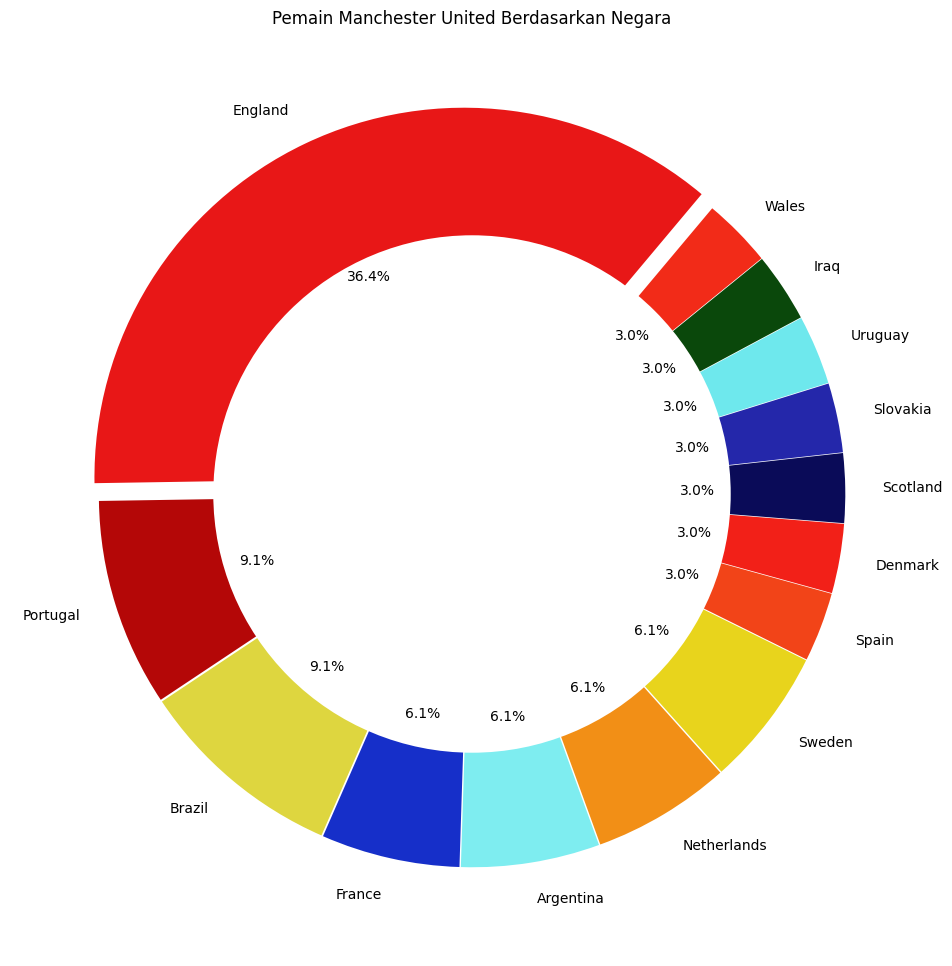

In [78]:
plt.figure(figsize=(12,12))
plt.pie(data_pie.Id_count, labels=data_pie.Negara, startangle=50, explode=explode,autopct='%1.1f%%', colors=warnaNegara)
plt.title('Pemain Manchester United Berdasarkan Negara')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

**Penjelasan** : Dari Grafik Pie di atas Jumlah pemain Manchester United yang berkebangsaan England memiliki nilai 36,4% dimana merupakan yang terbesar di banding negara lainnya. di posisi kedua ada Portugal dan Brazil yang sama sama 9,1%, lalu ada France, Argentina, Netherlands dan Sweden yang memiliki persentase 6,1%, terakhir yang memiliki persentase terendah yakni dengan 3,1% adalah Spain, Denmark, Scotland, Slovakia, Uruguay, Iraq dan Wales.

**Mengambil data Nama pemain MU dan Kaki terbaik yang digunakan pemain**

In [79]:
NamaMU = data[data["Klub"] == "Manchester United"]['Nama']
MUKaki = data[data["Klub"] == "Manchester United"]['Kaki Terbaik']
counts_Kaki = MUKaki.value_counts()
counts_Kaki = counts_Kaki.reset_index()
counts_Kaki.columns= ["Nama","Counts"]

**Membuat Scatter Plot**

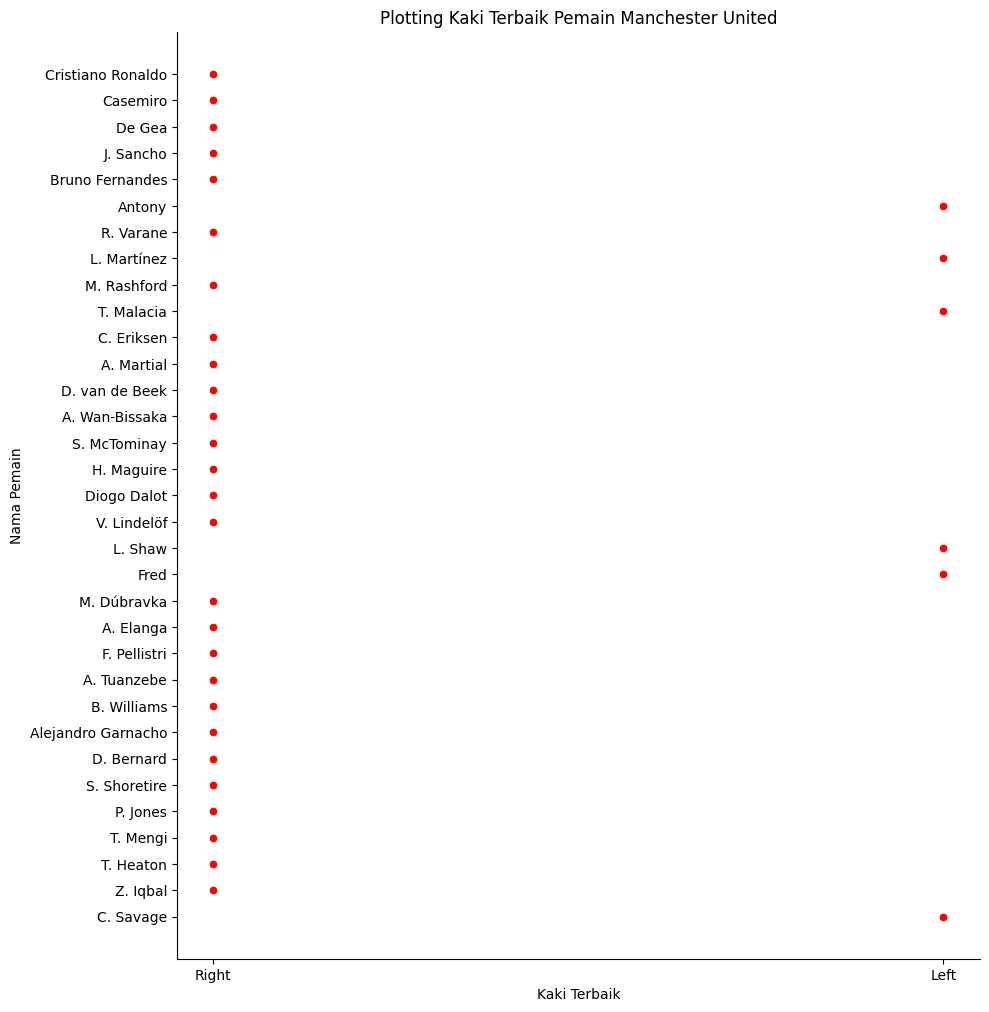

In [80]:
sns.relplot(data = data, y = NamaMU, x =MUKaki, color = 'red', height = 10)
plt.title("Plotting Kaki Terbaik Pemain Manchester United")
plt.xlabel("Kaki Terbaik")
plt.ylabel("Nama Pemain")
plt.show()

**Penjelasan** : Terlihat hanya 6 pemain MU yang mempunyai kaki kiri terbaik yakni Savage, Fred, Shaw, Malacia, Martinez dan Antony. sedangkan sisanya mempunyai kaki kanan terbaik yakni berjumlah 27 pemain.

**Membuat Grafik Batang**

Text(0, 0.5, 'Tinggi Badan')

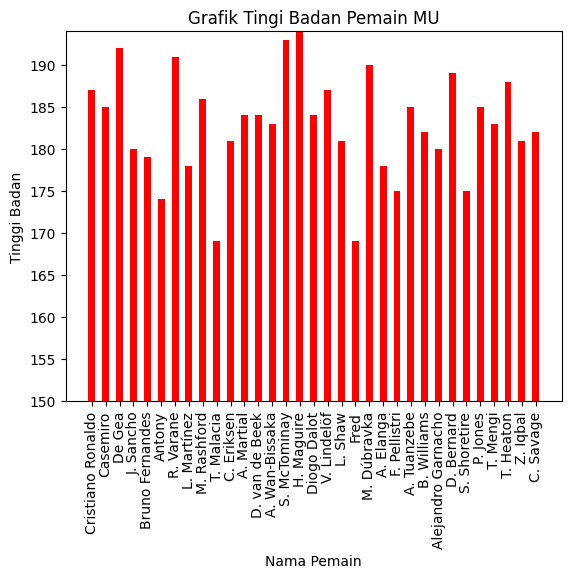

In [81]:
x = data[data["Klub"] == "Manchester United"]['Nama']
y = data[data["Klub"] == "Manchester United"]['Tinggi Badan']
plt.bar(x, y, color='red', width=0.5)
ax = plt.gca()
ax.set_ylim([150, 200])
plt.ylim(top = max(y))
plt.xticks(rotation='vertical')
plt.title("Grafik Tingi Badan Pemain MU")
plt.xlabel("Nama Pemain")
plt.ylabel("Tinggi Badan")

**Penjelasan** : Dari Grafik bisa dilihat untuk pemain tertinggi saat ini yang dimiliki Manchester United adalah Harry Maguire dengan tinggi badan 194 cm, sedangkan untuk pemain terendah yang dimiliki Manchester United adalah Malacia dan Fred keduanya memiliki tinggi badan 169 cm.

**Membuat BoxPlot**

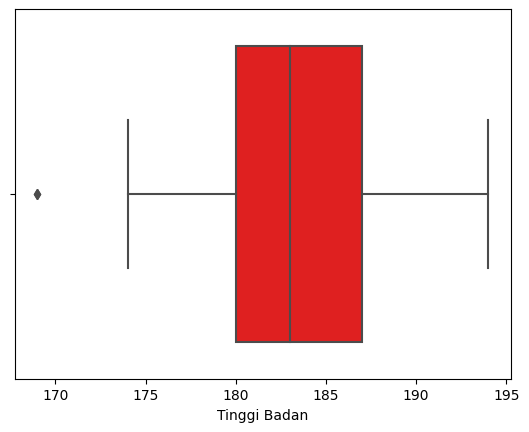

In [82]:
sns.boxplot(x=data[data["Klub"] == "Manchester United"]['Tinggi Badan'], color = 'red')
plt.show()

**Penjelasan** : Berdasarkan Gambar yang ada Mean atau rata rata tinggi Badan pemain Manchester United adalah 183 cm, dengan nilai Max adalah 194 cm dan nilai min adalah 169 cm.